In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data_cleaned_log.csv')
df = df.drop(['Unnamed: 0','EngExp'],axis=1)
df.columns

Index(['ProjectCode', 'LaborCost', 'Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor', 'ProfitPTD', 'WIP_PTD', 'ProfitPct'],
      dtype='object')

In [108]:
df.describe()

LaborCost      Overhead  OverheadRate  LaborRevenue  CompleteLabor  \
count  19392.000000  19392.000000  19392.000000  19392.000000   19392.000000   
mean       7.294555      8.040843      0.863723      8.845992       0.704816   
std        1.566301      1.621717      0.254019      1.374599       0.114977   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.330665      7.059601      0.715722      8.002527       0.693147   
50%        7.347180      8.118577      0.905135      8.853808       0.693147   
75%        8.348193      9.129035      1.043201      9.770013       0.693147   
max       10.791283     11.443626      2.219829     11.993875       2.885145   

           ProfitPTD       WIP_PTD     ProfitPct  
count   19392.000000  19392.000000  19392.000000  
mean     3172.591095      0.891399      0.234432  
std      8800.256004      0.311147      0.295784  
min    -97705.201570      0.000000     -0.997407  
25%       184.881990      1.000000      0.057060  
50%      1187.078014      1.000000      0.229704  
75%      3771.575127      1.000000      0.402690  
max    125686.000000      1.000000      0.999893

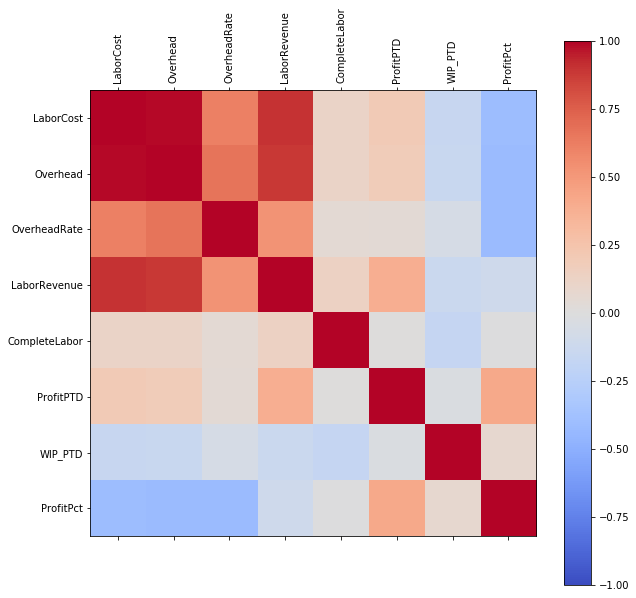

In [57]:
import matplotlib.pyplot as plt
import numpy as np
df1 = df.drop(columns=['ProjectCode'])
corr = df1.corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

In [19]:
 len(df)

19392

In [5]:
df1 = df.set_index('ProjectCode')
df1.columns

Index(['LaborCost', 'Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor', 'ProfitPTD', 'WIP_PTD', 'ProfitPct'],
      dtype='object')

In [5]:
df1.loc[:,'ProfitPct'].hist(bins = 20)

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df1.iloc[:,0:7], df1.loc[:,'ProfitPct'], test_size = 0.2, random_state = 0)

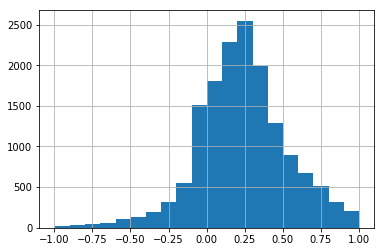

In [7]:
yTrain.hist(bins = 20)

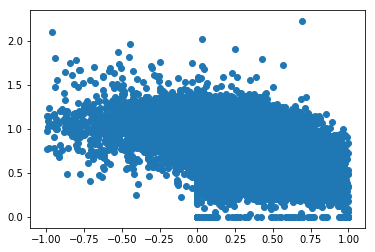

In [26]:
plt.scatter( df.ProfitPct,df.OverheadRate)

In [29]:
profit = df.ProfitPct>0
overhead = df.OverheadRate<1
len(df[profit&overhead])/len(df)

0.5799298679867987

In [30]:
profit = df.ProfitPct>0
overhead = df.OverheadRate>=1
len(df[profit&overhead])/len(df)

0.23076526402640263

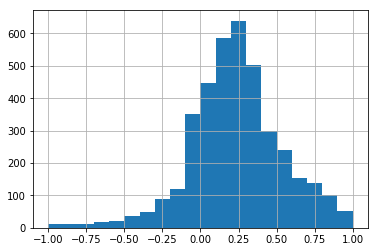

In [8]:
yTest.hist(bins = 20)

In [9]:
xTrain.corr()

LaborCost  Overhead  OverheadRate  LaborRevenue  CompleteLabor  \
LaborCost       1.000000  0.986323      0.609122      0.899714       0.111728   
Overhead        0.986323  1.000000      0.666887      0.887830       0.112414   
OverheadRate    0.609122  0.666887      1.000000      0.526465       0.050089   
LaborRevenue    0.899714  0.887830      0.526465      1.000000       0.134753   
CompleteLabor   0.111728  0.112414      0.050089      0.134753       1.000000   
ProfitPTD       0.198515  0.181453      0.038655      0.382915       0.006575   
WIP_PTD        -0.150197 -0.142848     -0.050361     -0.128563      -0.171095   

               ProfitPTD   WIP_PTD  
LaborCost       0.198515 -0.150197  
Overhead        0.181453 -0.142848  
OverheadRate    0.038655 -0.050361  
LaborRevenue    0.382915 -0.128563  
CompleteLabor   0.006575 -0.171095  
ProfitPTD       1.000000 -0.023839  
WIP_PTD        -0.023839  1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a217e4f28>,
      dtype=object)

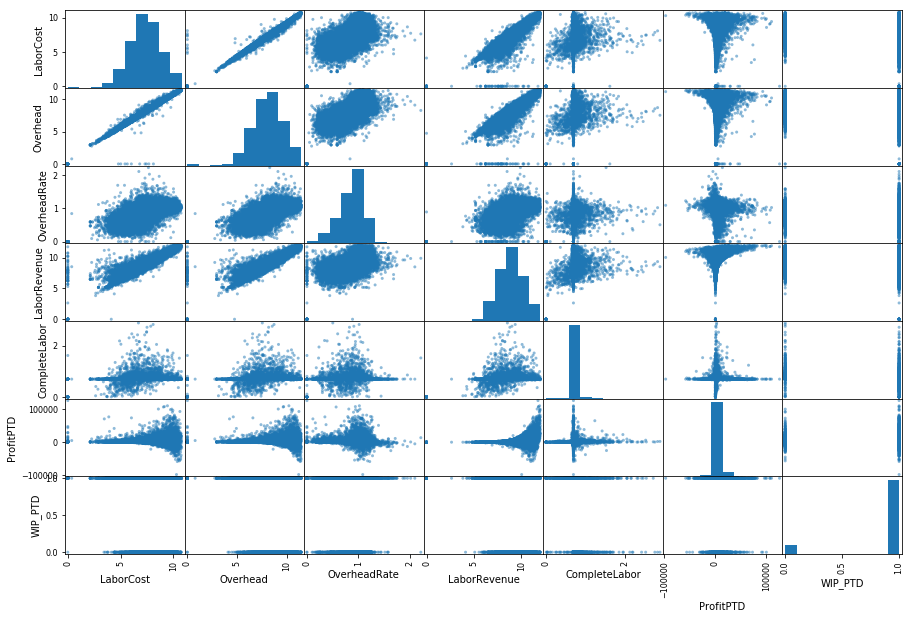

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(xTrain, figsize=(15,10))

In [11]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xTrain,yTrain)

y_pred=clf.predict(xTest)

In [102]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("r2:",metrics.r2_score(yTest, y_pred))
print("explained variance:",metrics.explained_variance_score(yTest, y_pred))
print("mean abs error:",metrics.mean_absolute_error(yTest, y_pred))
print("mean squared error:",metrics.mean_squared_error(yTest, y_pred))
print("median abs:",metrics.median_absolute_error(yTest, y_pred))

TypeError: object of type 'CategoricalDtype' has no len()

In [7]:
from sklearn.model_selection import train_test_split
features = [ 'LaborCost', 'Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']
xTrain, xTest, yTrain, yTest = train_test_split(df1[features], df1.loc[:,'ProfitPct'], test_size = 0.2, random_state = 0)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xTrain,yTrain)

y_pred=clf.predict(xTest)
print("r2:",metrics.r2_score(yTest, y_pred))
print("explained variance:",metrics.explained_variance_score(yTest, y_pred))
print("mean abs error:",metrics.mean_absolute_error(yTest, y_pred))
print("mean squared error:",metrics.mean_squared_error(yTest, y_pred))
print("median abs:",metrics.median_absolute_error(yTest, y_pred))

r2: 0.9109378451021148
explained variance: 0.9109482466401158
mean abs error: 0.043203983114146326
mean squared error: 0.008108884151611083
median abs: 0.019272212084252893


In [6]:
from sklearn.model_selection import train_test_split
features = ['LaborCost','Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']
features1 = ['Overhead', 'OverheadRate', 'LaborRevenue']
xTrain, xTest, yTrain, yTest = train_test_split(df1[features], df1.loc[:,'ProfitPct'], test_size = 0.2, random_state = 0)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100,max_depth=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xTrain,yTrain)

y_pred=clf.predict(xTest)
print("r2:",metrics.r2_score(yTest, y_pred))
print("explained variance:",metrics.explained_variance_score(yTest, y_pred))
print("mean abs error:",metrics.mean_absolute_error(yTest, y_pred))
print("mean squared error:",metrics.mean_squared_error(yTest, y_pred))
print("median abs:",metrics.median_absolute_error(yTest, y_pred))
clf.feature_importances_

r2: 0.8668538219322248
explained variance: 0.8668706116152546
mean abs error: 0.06269261004993076
mean squared error: 0.012122623064973768
median abs: 0.03278014888631969


array([3.09587098e-02, 4.88148342e-01, 1.49784684e-02, 4.63722615e-01,
       1.83533997e-03, 3.56524696e-04])

In [11]:
clf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("r2:",metrics.r2_score(yTest, y_pred))
    
    return accuracy

In [32]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [150,170,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,7,10]
# Minimum number of samples required to split a node
min_samples_split = [40,50,60,70]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50,70,100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 70, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_random.fit(xTrain,yTrain)

best_random = rf_random.best_estimator_


Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  4.1min finished


In [33]:
random_accuracy = evaluate(best_random, xTest, yTest)
best_random

Model Performance
Average Error: 0.0723 degrees.
Accuracy = -inf%.
r2: 0.6109610187594184


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=40,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [300,350,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,15,20,25,30]
# Minimum number of samples required to split a node
min_samples_split = [70,80,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50,60,100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}

features = ['Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']
xTrain, xTest, yTrain, yTest = train_test_split(df1[features], df1.loc[:,'ProfitPct'], test_size = 0.20, random_state = 0)


gbr = GradientBoostingRegressor()
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
#Train the model using the training sets y_pred=clf.predict(X_test)
gbr_random.fit(xTrain,yTrain)
best_random = gbr_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.3min finished


In [18]:
best_random

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=15,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=60, min_samples_split=70,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
features = ['Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']
xTrain, xTest, yTrain, yTest = train_test_split(df1[features], df1.loc[:,'ProfitPct'], test_size = 0.2, random_state = 0)


adbr = GradientBoostingRegressor(n_estimators=300,max_depth=15,min_samples_split=70,min_samples_leaf=60)
adbr.fit(xTrain,yTrain)
y_pred = adbr.predict(xTest)
print("r2:",metrics.r2_score(yTest, y_pred))
print("explained variance:",metrics.explained_variance_score(yTest, y_pred))
print("mean abs error:",metrics.mean_absolute_error(yTest, y_pred))
print("mean squared error:",metrics.mean_squared_error(yTest, y_pred))
print("median abs:",metrics.median_absolute_error(yTest, y_pred))

r2: 0.9024857707873909
explained variance: 0.9025695403574966
mean abs error: 0.05334874109045153
mean squared error: 0.008878424160355381
median abs: 0.0311385693034687


In [78]:
df1['Profitability'] = pd.cut(x=df1.ProfitPct,
                     bins=[-1.0,-0.5,0.0,0.5,1.0],
                     labels=['very unprofitable','unprofitable','profitable','very profitable'])
features = ['Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
df1['Profitability1'] = pd.cut(x=df1.ProfitPct,
                     bins=[-1.0,-0.5,0.0,0.5,1.0],
                     labels=['very unprofitable','unprofitable','profitable','very profitable'])
df1['Profitability'] = pd.cut(x=df1.ProfitPct,
                     bins=[-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0],
                     labels=['extremely unprofitable','very unprofitable','unprofitable','slightly unprofitable','slightly profitable','profitable','very profitable','extremely profitable'])
features = ['Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']
xTrain, xTest, yTrain, yTest = train_test_split(df1[features], df1.loc[:,'Profitability1'], test_size = 0.25, random_state = 0)
adbr = GradientBoostingClassifier(n_estimators=300,max_depth=15,min_samples_split=70,min_samples_leaf=60)
adbr.fit(xTrain,yTrain)
y_pred = adbr.predict(xTest)
print("accuracy score:",metrics.accuracy_score(yTest, y_pred))
print("precision score:",metrics.precision_score(yTest, y_pred,average='weighted'))


accuracy score: 0.9123349834983498
precision score: 0.9105451137945951


In [ ]:
adbr.feature_importances_

In [10]:
labels=['extremely unprofitable','very unprofitable','unprofitable','slightly unprofitable','slightly profitable','profitable','very profitable','extremely profitable']
print(metrics.classification_report(yTest, y_pred,target_names=labels))

                        precision    recall  f1-score   support

extremely unprofitable       0.90      0.84      0.87       244
     very unprofitable       0.47      0.20      0.28        35
          unprofitable       0.82      0.84      0.83      1376
 slightly unprofitable       0.84      0.85      0.84      1696
   slightly profitable       0.75      0.76      0.75       682
            profitable       0.50      0.44      0.47       151
       very profitable       0.84      0.84      0.84       605
  extremely profitable       0.31      0.25      0.28        59

              accuracy                           0.81      4848
             macro avg       0.68      0.63      0.65      4848
          weighted avg       0.80      0.81      0.81      4848



In [82]:
##metrics.multilabel_confusion_matrix(yTest, y_pred)
arr = metrics.multilabel_confusion_matrix(yTest, y_pred)
arr = np.array(arr)
arr

array([[[4578,   26],
        [  35,  209]],

       [[4804,    9],
        [  27,    8]],

       [[3231,  241],
        [ 218, 1158]],

       [[2870,  282],
        [ 268, 1428]],

       [[3987,  179],
        [ 169,  513]],

       [[4627,   70],
        [  86,   65]],

       [[4148,   95],
        [  91,  514]],

       [[4752,   37],
        [  45,   14]]])

In [11]:
art = metrics.confusion_matrix(yTest, y_pred)

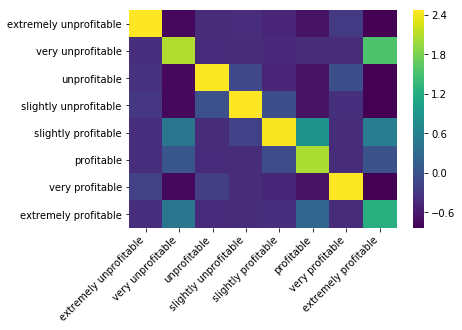

In [21]:
import seaborn as sns
 
import matplotlib.pyplot as plt
df_map = pd.DataFrame(art)
df_norm_col=(df_map-df_map.mean())/df_map.std()
labels=['extremely unprofitable','very unprofitable','unprofitable','slightly unprofitable','slightly profitable','profitable','very profitable','extremely profitable']
chart = sns.heatmap(df_norm_col, cmap='viridis',xticklabels=labels,yticklabels=labels)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()


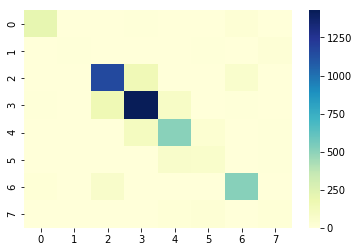

In [86]:
import numpy as np
import seaborn as sns
sns.heatmap(art,cmap="YlGnBu")


In [87]:
art

array([[ 209,    0,    1,    9,    0,    0,   25,    0],
       [   0,    8,    0,    0,    4,    6,    0,   17],
       [   4,    0, 1158,  153,    0,    0,   61,    0],
       [   7,    0,  165, 1428,   87,    1,    8,    0],
       [   0,    4,    3,  113,  513,   37,    1,   11],
       [   0,    2,    1,    2,   72,   65,    0,    9],
       [  15,    0,   71,    4,    1,    0,  514,    0],
       [   0,    3,    0,    1,   15,   26,    0,   14]])

In [83]:
df1['Profitability'] = pd.cut(x=df.ProfitPct,
                     bins=[-1.0,-0.5,0.0,0.5,1.0],
                     labels=['very unprofitable','unprofitable','profitable','very profitable'])

from sklearn.model_selection import train_test_split
features = ['LaborCost','Overhead', 'OverheadRate', 'LaborRevenue',
       'CompleteLabor',  'WIP_PTD']
features1 = ['Overhead', 'OverheadRate', 'LaborRevenue']
xTrain, xTest, yTrain, yTest = train_test_split(df1[features], df1.loc[:,'Profitability'], test_size = 0.2, random_state = 0)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xTrain,yTrain)

y_pred=clf.predict(xTest)
print("r2:",metrics.r2_score(yTest, y_pred))
print("explained variance:",metrics.explained_variance_score(yTest, y_pred))
print("mean abs error:",metrics.mean_absolute_error(yTest, y_pred))
print("mean squared error:",metrics.mean_squared_error(yTest, y_pred))
print("median abs:",metrics.median_absolute_error(yTest, y_pred))
clf.feature_importances_

TypeError: object of type 'CategoricalDtype' has no len()

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly',C=100,epsilon=0.5)
svm_poly_reg.fit(xTrain,yTrain)
y_svm=svm_poly_reg.predict(xTest)

print("r2:",metrics.r2_score(yTest, y_svm))
print("explained variance:",metrics.explained_variance_score(yTest, y_svm))
print("mean abs error:",metrics.mean_absolute_error(yTest, y_svm))
print("mean squared error:",metrics.mean_squared_error(yTest, y_svm))
print("median abs:",metrics.median_absolute_error(yTest, y_svm))
clf.feature_importances_

/Users/stevendirjayanto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:

from sklearn.tree import export_graphviz

# Extract single tree
estimator = clf.estimators_[5] 

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')